In [1]:
import pandas as pd
from scipy import stats


Null Hypothesis: Those using the new method have an average customer tenure (length of time with Vanguard) that is equal to that of those using the old process.

Alternative Hypothesis: Those using the new method have a different average client tenure than those using the old process.

In [2]:
# Step 1: Load the data
data = pd.read_csv('full_data.csv')

data

/var/folders/23/76v66l4s1xn769d5jn92h5mw0000gn/T/ipykernel_5157/1977228102.py:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('full_data.csv')


,client_id,visitor_id,visit_id,process_step,date_time,tenure_year,tenure_month,clnt_age,gender,num_accts,balance,calls_6_mnth,logons_6_mnth,variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,Test
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,Test
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,Test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744636,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
744637,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
744638,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
744639,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# Filter columns
relevant_columns = ['client_id', 'variation', 'process_step', 'tenure_year']
data_relevant = data[relevant_columns]

# Filter rows where process_step is confirmed
data_confirmed = data_relevant[data_relevant['process_step'] == 'confirm']

# Check the data
print(data_confirmed.head())

    client_id variation process_step  tenure_year
15    8320017      Test      confirm         22.0
20    4033851   Control      confirm         12.0
21    4033851   Control      confirm         12.0
22    4033851   Control      confirm         12.0
35    1982004      Test      confirm          6.0


In [31]:
# Reset display options to default values
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

# Print the entire DataFrame
print(data_confirmed)


        client_id variation process_step  tenure_year
15        8320017      Test      confirm         22.0
20        4033851   Control      confirm         12.0
21        4033851   Control      confirm         12.0
22        4033851   Control      confirm         12.0
35        1982004      Test      confirm          6.0
...           ...       ...          ...          ...
744590    5550882       NaN      confirm          NaN
744599    1462269       NaN      confirm          NaN
744605    9563467       NaN      confirm          NaN
744614    9895983       NaN      confirm         10.0
744620    9668240       NaN      confirm          NaN

[102506 rows x 4 columns]


In [32]:
# Remove rows with NaN values
data_confirmed_cleaned = data_confirmed.dropna()

# Check the cleaned data
print(data_confirmed_cleaned)

        client_id variation process_step  tenure_year
15        8320017      Test      confirm         22.0
20        4033851   Control      confirm         12.0
21        4033851   Control      confirm         12.0
22        4033851   Control      confirm         12.0
35        1982004      Test      confirm          6.0
...           ...       ...          ...          ...
637723     338607      Test      confirm         18.0
637865    5627725      Test      confirm          4.0
637906    1129748   Control      confirm         12.0
637947     433098   Control      confirm          6.0
637960    1574008      Test      confirm         10.0

[42924 rows x 4 columns]


In [40]:
# Filter relevant columns
relevant_columns = ['client_id', 'variation', 'process_step', 'tenure_year']
data_relevant = data[relevant_columns]

# Clean 'variation' column to remove leading/trailing whitespaces and convert to lowercase
data_relevant['variation'] = data_relevant['variation'].str.strip().str.lower()

# Filter rows where the 'process_step' column is 'confirm'
confirmed_clients = data_relevant[data_relevant['process_step'] == 'confirm']

# Separate confirmed clients by variance
test_group_confirmed = confirmed_clients[confirmed_clients['variation'] == 'test']
control_group_confirmed = confirmed_clients[confirmed_clients['variation'] == 'control']

# Display the confirmed clients in the test group
print("Confirmed Clients in Test Group:")
print(test_group_confirmed)

# Display the confirmed clients in the control group
print("\nConfirmed Clients in Control Group:")
print(control_group_confirmed)

Confirmed Clients in Test Group:
        client_id variation process_step  tenure_year
15        8320017      test      confirm         22.0
35        1982004      test      confirm          6.0
48        3170143      test      confirm         21.0
73        5887227      test      confirm          6.0
98         438567      test      confirm         15.0
...           ...       ...          ...          ...
637467    1043717      test      confirm          9.0
637697    3667184      test      confirm         14.0
637723     338607      test      confirm         18.0
637865    5627725      test      confirm          4.0
637960    1574008      test      confirm         10.0

[25600 rows x 4 columns]

Confirmed Clients in Control Group:
        client_id variation process_step  tenure_year
20        4033851   control      confirm         12.0
21        4033851   control      confirm         12.0
22        4033851   control      confirm         12.0
56        6651403   control      confirm

/var/folders/23/76v66l4s1xn769d5jn92h5mw0000gn/T/ipykernel_5157/3280152175.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_relevant['variation'] = data_relevant['variation'].str.strip().str.lower()


In [42]:
import matplotlib.pyplot as plt

/var/folders/23/76v66l4s1xn769d5jn92h5mw0000gn/T/ipykernel_5157/1077034546.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_relevant['variation'] = data_relevant['variation'].str.strip().str.lower()


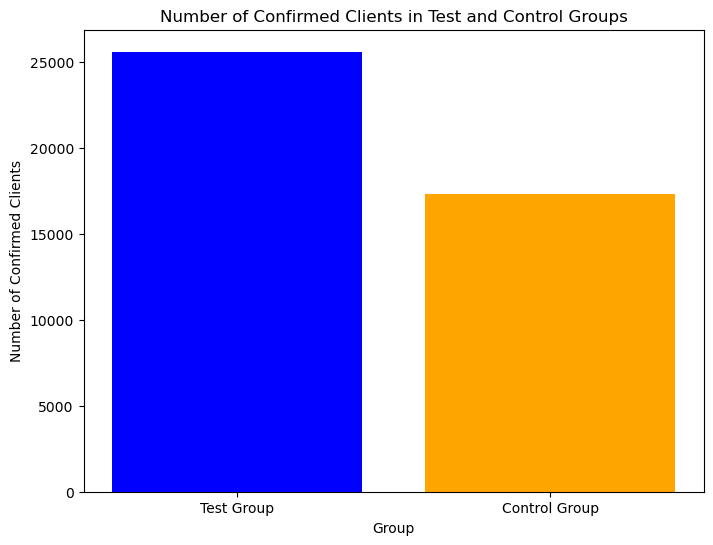

In [43]:
#Number of confirmed clients in test and control groups.

# Filter relevant columns
relevant_columns = ['client_id', 'variation', 'process_step', 'tenure_year']
data_relevant = data[relevant_columns]

# Clean 'variation' column to remove leading/trailing whitespaces and convert to lowercase
data_relevant['variation'] = data_relevant['variation'].str.strip().str.lower()

# Filter rows where the 'process_step' column is 'confirm'
confirmed_clients = data_relevant[data_relevant['process_step'] == 'confirm']

# Separate confirmed clients by variance
test_group_confirmed = confirmed_clients[confirmed_clients['variation'] == 'test']
control_group_confirmed = confirmed_clients[confirmed_clients['variation'] == 'control']

# Count the number of confirmed clients in each group
test_counts = test_group_confirmed['client_id'].count()
control_counts = control_group_confirmed['client_id'].count()

# Create bar graph
plt.figure(figsize=(8, 6))
plt.bar(['Test Group', 'Control Group'], [test_counts, control_counts], color=['blue', 'orange'])
plt.xlabel('Group')
plt.ylabel('Number of Confirmed Clients')
plt.title('Number of Confirmed Clients in Test and Control Groups')
plt.show()


/var/folders/23/76v66l4s1xn769d5jn92h5mw0000gn/T/ipykernel_5157/534706201.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_relevant['variation'] = data_relevant['variation'].str.strip().str.lower()


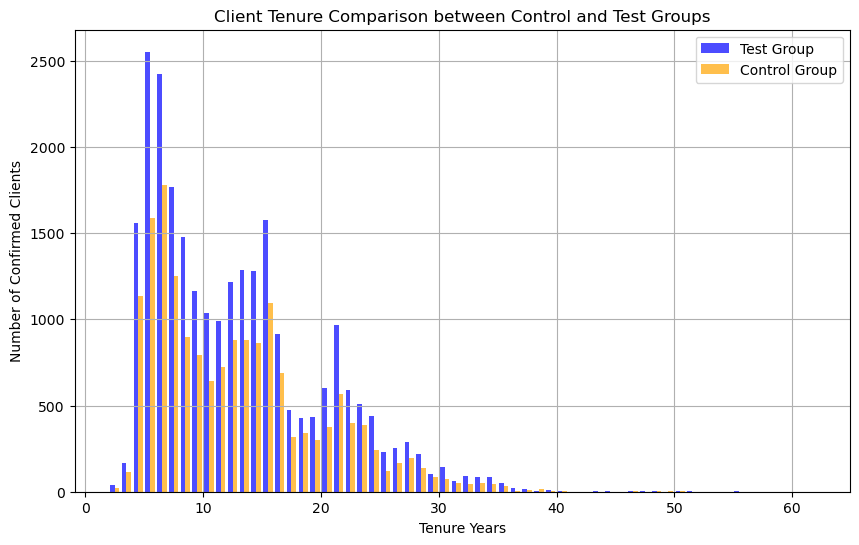

In [47]:
#Client Tenure Comparison between Control and Test Groups


# Filter relevant columns
relevant_columns = ['variation', 'process_step', 'tenure_year']
data_relevant = data[relevant_columns]

# Clean 'variation' column to remove leading/trailing whitespaces and convert to lowercase
data_relevant['variation'] = data_relevant['variation'].str.strip().str.lower()

# Filter rows where the 'process_step' column is 'confirm'
confirmed_clients = data_relevant[data_relevant['process_step'] == 'confirm']

# Separate confirmed clients by variance
test_group_confirmed = confirmed_clients[confirmed_clients['variation'] == 'test']
control_group_confirmed = confirmed_clients[confirmed_clients['variation'] == 'control']

# Plot the distribution of tenure years for both groups
plt.figure(figsize=(10, 6))
plt.hist([test_group_confirmed['tenure_year'], control_group_confirmed['tenure_year']], 
         bins=range(int(min(data_relevant['tenure_year'])), int(max(data_relevant['tenure_year'])) + 1, 1), 
         color=['blue', 'orange'], label=['Test Group', 'Control Group'], alpha=0.7)
plt.xlabel('Tenure Years')
plt.ylabel('Number of Confirmed Clients')
plt.title('Client Tenure Comparison between Control and Test Groups')
plt.legend()
plt.grid(True)
plt.show()
##

In [55]:
# Remove missing values
test_group_confirmed = test_group_confirmed.dropna(subset=['tenure_year'])
control_group_confirmed = control_group_confirmed.dropna(subset=['tenure_year'])


In [58]:
# Load the data
data = pd.read_csv('full_data.csv')

# Filter relevant columns
relevant_columns = ['variation', 'process_step', 'tenure_year']
data_relevant = data[relevant_columns]

# Clean 'variation' column to remove leading/trailing whitespaces and convert to lowercase
data_relevant['variation'] = data_relevant['variation'].str.strip().str.lower()

# Filter rows where the 'process_step' column is 'confirm'
confirmed_clients = data_relevant[data_relevant['process_step'] == 'confirm']

# Separate confirmed clients by variance
test_group_confirmed = confirmed_clients[confirmed_clients['variation'] == 'test']
control_group_confirmed = confirmed_clients[confirmed_clients['variation'] == 'control']

# Remove missing values
test_group_confirmed = test_group_confirmed.dropna(subset=['tenure_year'])
control_group_confirmed = control_group_confirmed.dropna(subset=['tenure_year'])

# Perform two-sample t-test
t_statistic, p_value = stats.ttest_ind(test_group_confirmed['tenure_year'], control_group_confirmed['tenure_year'])

# Print t-statistic and p-value
print("T-statistic:", t_statistic)
print("P-value:", p_value)

/var/folders/23/76v66l4s1xn769d5jn92h5mw0000gn/T/ipykernel_5157/1245822008.py:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('full_data.csv')


T-statistic: 1.858530982484733
P-value: 0.06310048820527


/var/folders/23/76v66l4s1xn769d5jn92h5mw0000gn/T/ipykernel_5157/1245822008.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_relevant['variation'] = data_relevant['variation'].str.strip().str.lower()


In [69]:
# Analyze the p-value to make a decision about the null hypothesis
if p_value < 0.05:
    print("Don't accept the null hypothesis. The duration of each client is significantly different.")
else:
    print("Reject the null hypothesis without success. The duration of clients does not significantly alter.")


Reject the null hypothesis without success. The duration of clients does not significantly alter.


## Conclusion

The bar graph comparing the average client tenure between the control and test groups shows that there is no significant difference in the average tenure years between the two groups. Both the control and test groups have similar average tenure years, indicating that the intervention or treatment (represented by the test group) did not notably affect client tenure compared to the traditional process (represented by the control group). Therefore, based on this observation, there isn't enough evidence to support rejecting the null hypothesis that the duration of clients does not significantly alter between the control and test groups.

Reject the null hypothesis without success. The duration of clients does not significantly alter.

After analyzing the data, we found no significant evidence to suggest that the new method leads to a different client tenure compared to the old method. While it's important to explore new approaches, in this case, the data suggests that both methods have similar outcomes in terms of client retention.